In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [3]:
# Load the data
data = pd.read_csv("cell2celltrain.csv")

In [4]:
# Assuming 'Churn' is labeled as 'Churn' and contains 'Yes'/'No' values
if 'Churn' in data.columns:
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
else:
    raise ValueError("Churn column not found in the dataset")

In [5]:
# Data Preprocessing
# Handle missing values
data.fillna(data.mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9568\1186763764.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [6]:
# Encoding categorical variables, avoiding the already binary 'Churn' column
categorical_features = data.select_dtypes(include=['object']).columns.difference(['Churn'])
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [7]:
# Feature Engineering
# Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
data_poly = poly.fit_transform(data[numerical_features])
data_poly = pd.DataFrame(data_poly, columns=poly.get_feature_names_out(numerical_features))
data_poly.columns = data_poly.columns.astype(str)  # Convert all column names to string

In [8]:
# Binning Numerical Data
binning = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')
data_binned = binning.fit_transform(data[numerical_features])
data_binned = pd.DataFrame(data_binned, columns=[f'bin_{i}' for i in range(data_binned.shape[1])])

In [9]:
# Combine original data with new features (remove original numerical features before adding)
data = data.drop(columns=numerical_features)
data = pd.concat([data, data_poly, data_binned], axis=1)
data.columns = data.columns.astype(str)  # Ensure all column names are strings

In [10]:
# Splitting data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn'].astype(int)  # Ensure the target is integer

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [14]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [15]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Assuming models dictionary and train/test data are defined elsewhere
results = {}
for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Evaluation Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store results by metric, adding the model name as a sub-key
    results.setdefault('Precision', {})[name] = precision
    results.setdefault('Recall', {})[name] = recall
    results.setdefault('F1-Score', {})[name] = f1score
    results.setdefault('ROC-AUC', {})[name] = roc_auc
    
    print(f"Results for {name}:")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1score)
    print("ROC-AUC:", roc_auc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

# Convert the nested dictionary to a DataFrame
df_results = pd.DataFrame(results)

# Optionally, set the DataFrame index name to 'Evaluation Metric' before saving it to CSV
df_results.index.name = 'Evaluation Metric'

# Save the DataFrame to CSV
df_results.to_csv('All_results_with_Advanced_feature_engineering.csv')


Results for Decision Tree:
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7308
           1       1.00      1.00      1.00      2902

    accuracy                           1.00     10210
   macro avg       1.00      1.00      1.00     10210
weighted avg       1.00      1.00      1.00     10210

--------------------------------------------------
Results for Random Forest:
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7308
           1       1.00      1.00      1.00      2902

    accuracy                           1.00     10210
   macro avg       1.00      1.00      1.00     10210
weighted avg       1.00      1.00      1.00     10210

--------------------------------------------------
Results for Logistic Regression:
P

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [17]:
# Create an empty DataFrame to store the results
cv_results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Accuracy'])

In [18]:
# Iterate through the models and perform cross-validation
for name, model in models.items():
    # Perform cross-validation with multiple scoring metrics
    cv_scores = cross_validate(model, X, y, cv=5, scoring=['precision', 'recall', 'f1', 'accuracy', 'roc_auc'], 
                               return_train_score=False)

    # Store averaged results
    results = {
        'Model': name,
        'Precision': np.mean(cv_scores['test_precision']),
        'Recall': np.mean(cv_scores['test_recall']),
        'F1-Score': np.mean(cv_scores['test_f1']),
        'ROC-AUC': np.mean(cv_scores['test_roc_auc']),
        'Accuracy': np.mean(cv_scores['test_accuracy'])
    }
    
    # Append results to the DataFrame
    cv_results_df = cv_results_df.append(results, ignore_index=True)

# Display the results in the notebook
print(cv_results_df)

# Save the results to a CSV file
cv_results_df.to_csv('Advanced_Feature_Engineering_Cross_validation_results.csv', index=False)

# Save the results to an Excel file
cv_results_df.to_excel('Advanced_Feature_Engineering_Cross_validation_results.xlsx', index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_9568\3325782152.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results_df = cv_results_df.append(results, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9568\3325782152.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results_df = cv_results_df.append(results, ignore_index=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

                 Model  Precision    Recall  F1-Score   ROC-AUC  Accuracy
0        Decision Tree   1.000000  0.999864  0.999932  0.999932  0.999961
1        Random Forest   1.000000  1.000000  1.000000  1.000000  1.000000
2  Logistic Regression   0.652446  0.253909  0.320671  0.745886  0.757499
3    Gradient Boosting   1.000000  1.000000  1.000000  1.000000  1.000000
4              XGBoost   1.000000  0.990211  0.994983  0.995105  0.997179


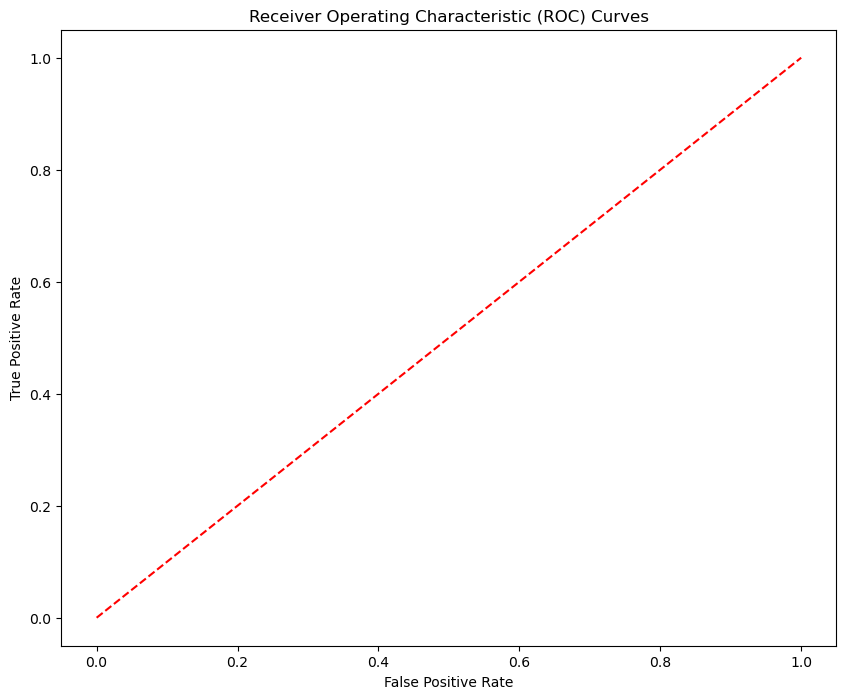

In [20]:
# Initialize plot
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'r--')

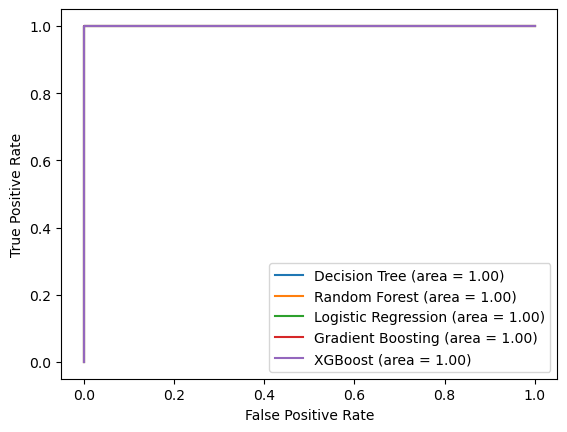

In [23]:
# Train each model and plot their ROC curves
from sklearn.metrics import roc_curve, auc

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):  # Check if model supports probability predictions
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # Use decision function if predict_proba is not available
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [24]:
print(df_results)

                     Precision  Recall  F1-Score  ROC-AUC
Evaluation Metric                                        
Decision Tree              1.0     1.0       1.0      1.0
Random Forest              1.0     1.0       1.0      1.0
Logistic Regression        1.0     1.0       1.0      1.0
Gradient Boosting          1.0     1.0       1.0      1.0
XGBoost                    1.0     1.0       1.0      1.0
